For solving path dependencies

In [3]:
import sys
import os

current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

------ Train scores: ------ 
{'binary_accuracy': 0.944954128440367, 'mean_squared_error': 0.05323181768797773}
------ Validation scores: ------ 
{'binary_accuracy': 1.0, 'mean_squared_error': 0.02413122075943478}
------ Test scores: ------ 
{'binary_accuracy': 0.9398148148148148, 'mean_squared_error': 0.03399079440945494}


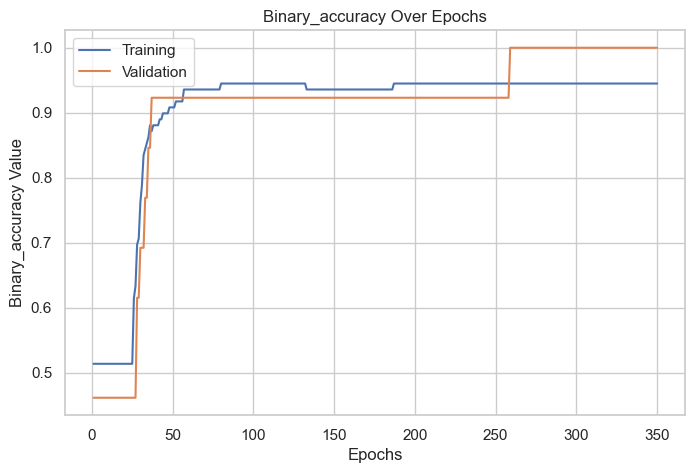

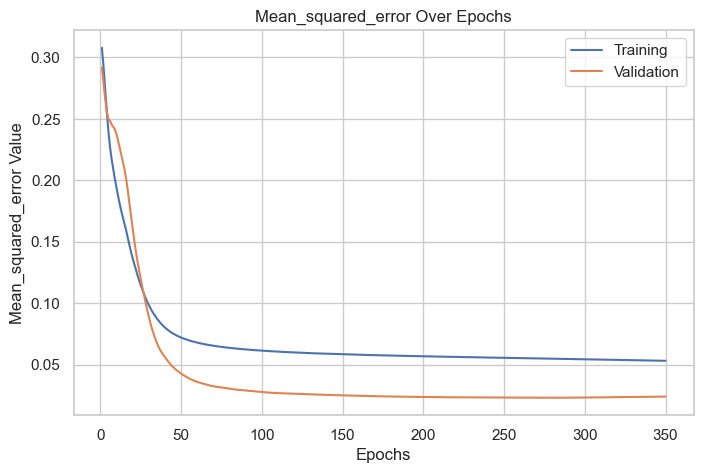

In [143]:
from sklearn.model_selection import train_test_split
from src.main.utilities.dataset_handler import get_monk
from src.main.models.layers.dense import Dense
from src.main.models.model import Model
from src.main.optimizer import SGD
from src.main.regularizer import L2, L1
from src.main.utilities.utils import log_experiment, setup_experiment

x_train, y_train, x_test, y_test = get_monk(3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

epochs = 350
batch_size = x_train.shape[0]

model = Model()
model.add(Dense(17, 4, activation="relu", weight_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(Dense(4, 1, activation="sigmoid", weight_initializer="glorot_uniform", bias_initializer="zeros"))

optimizer = SGD(learning_rate=0.45, momentum=0.8)
reg = L2(0.0007)

model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["binary_accuracy"], regularizer=reg)

_, history = model.fit(x_train, y_train, x_val, y_val, epochs=epochs, batch_size=batch_size, verbose=False)

train_score = model.evaluate(x_train, y_train)
val_score = model.evaluate(x_val, y_val)
test_score = model.evaluate(x_test, y_test)
train_std = {}
val_std = {}
test_std = {}

for key in test_score.keys():
    train_std[key] = 0.0
    val_std[key] = 0.0
    test_std[key] = 0.0


print("------ Train scores: ------ ")
print(train_score)
print("------ Validation scores: ------ ")
print(val_score)
print("------ Test scores: ------ ")
print(test_score)

log_experiment(setup_experiment("monk3_reg_2"),model, epochs, batch_size,train_score, train_std, val_score, val_std, test_score, test_std, [history])


